<a href="https://colab.research.google.com/github/franciscolang/Southern_Ocean_BL/blob/master/test_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print('hello world 2')

hello world 2


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [ ]:
#print(tf.__version__)
print(np.__version__)

1.25.2


In [ ]:
!pip install metpy
#from metpy.units import units

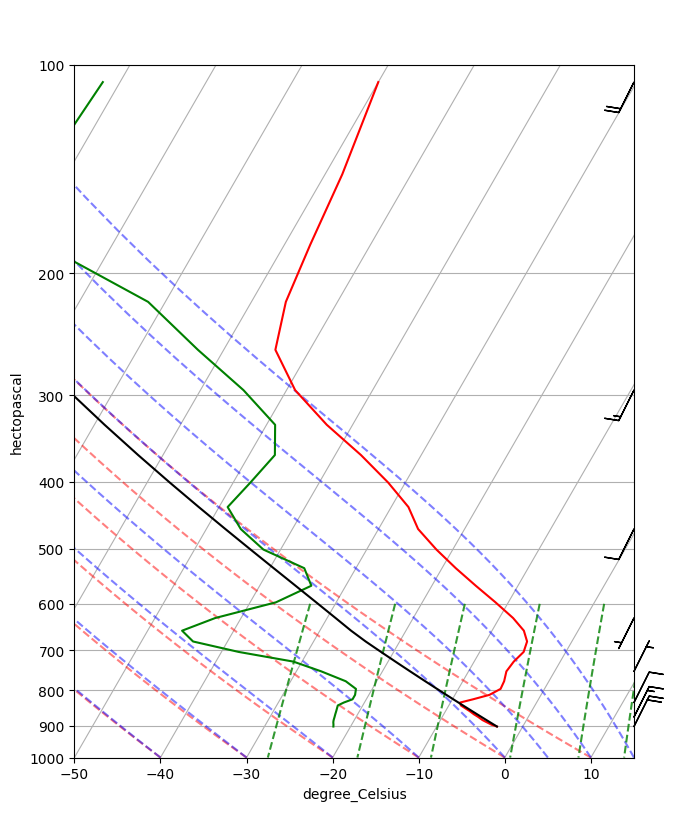

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import metpy.calc as mpcalc
from metpy.plots import SkewT
from metpy.units import units

fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig)

# Create arrays of pressure, temperature, dewpoint, and wind components
p = [902, 897, 893, 889, 883, 874, 866, 857, 849, 841, 833, 824, 812, 796, 776, 751,
     727, 704, 680, 656, 629, 597, 565, 533, 501, 468, 435, 401, 366, 331, 295, 258,
     220, 182, 144, 106] * units.hPa
t = [-3, -3.7, -4.1, -4.5, -5.1, -5.8, -6.5, -7.2, -7.9, -8.6, -8.9, -7.6, -6, -5.1,
     -5.2, -5.6, -5.4, -4.9, -5.2, -6.3, -8.4, -11.5, -14.9, -18.4, -21.9, -25.4,
     -28, -32, -37, -43, -49, -54, -56, -57, -58, -60] * units.degC
td = [-22, -22.1, -22.2, -22.3, -22.4, -22.5, -22.6, -22.7, -22.8, -22.9, -22.4,
      -21.6, -21.6, -21.9, -23.6, -27.1, -31, -38, -44, -46, -43, -37, -34, -36,
      -42, -46, -49, -48, -47, -49, -55, -63, -72, -88, -93, -92] * units.degC
# Calculate parcel profile
prof = mpcalc.parcel_profile(p, t[0], td[0]).to('degC')
u = np.linspace(-10, 10, len(p)) * units.knots
v = np.linspace(-20, 20, len(p)) * units.knots

skew.plot(p, t, 'r')
skew.plot(p, td, 'g')
skew.plot(p, prof, 'k')  # Plot parcel profile
skew.plot_barbs(p[::5], u[::5], v[::5])

skew.ax.set_xlim(-50, 15)
skew.ax.set_ylim(1000, 100)

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

plt.show()